In [1]:
# Отключаем ворнинги
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as pltimg 

import skimage.transform as imagetransform
from PIL import Image
import requests

# Seaborn
import seaborn as sns
sns.set_theme()

# Plotly
import plotly.express as px
import plotly

# для построения графиков в этом же окне браузера
%matplotlib inline

# Задача1

In [2]:
# Сформировать массив данных с шагом 0.01 для функции 𝑦(𝑥)=𝑐𝑜𝑠(20·𝑥) / (𝑥+0,1), 𝑥 ε [0;4]

start_x = 0
step_x = 0.01
stop_x = 4 + step_x
x = np.arange(start_x, stop_x, step_x)
y = np.cos(x * 20) / (x + 0.1)

In [3]:
# отобразить эти данные на экране в виде обычного графика в декартовых координатных осях с помощью библиотеки matplotlib. 
# График должен быть вынесен в отдельную функцию.

def show_matplotlib(x, y):
    plt.plot(x, y, linewidth=2, color='g', label='f(x)')
    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$f(x)$', fontsize=16)
    plt.title('f(x), matplotlib', fontsize=16)
    plt.legend(fontsize=18, loc=0)


In [4]:
# Отобразить тот же график с помощью библиотеки seaborn. Убедиться, что все настройки заданы верно. 
# График должен быть вынесен в отдельную функцию.

def show_seaborn(x, y):
    sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
    sns.set_theme(style="whitegrid")
    plt.plot(x, y, linewidth=2, color='g', label='f(x)')
    plt.xlabel(r'$x$', fontsize=14)
    plt.ylabel(r'$f(x)$', fontsize=14)
    plt.title('f(x), seaborn', fontsize=20)
    plt.legend(fontsize=14, loc=0)

In [5]:
# Отобразить тот же график с помощью библиотеки plotly. Убедиться, что все настройки заданы верно. 
# График должен быть вынесен в отдельную функцию.

def show_plotly(x, y):
    fig = px.line({'x':x, 'y':y}, x="x", y="y", title='f(x), plotly', 
                  labels={'y':'f(x)'}, 
                  width=820, height=500, template='presentation')
    return fig

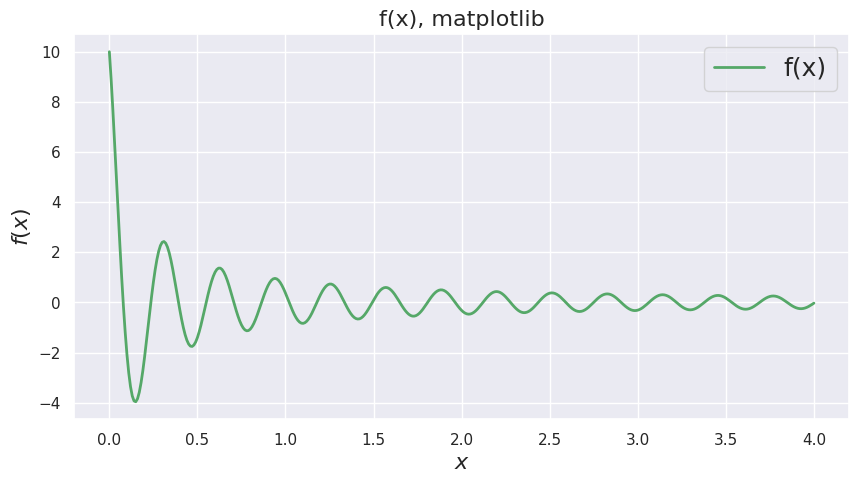

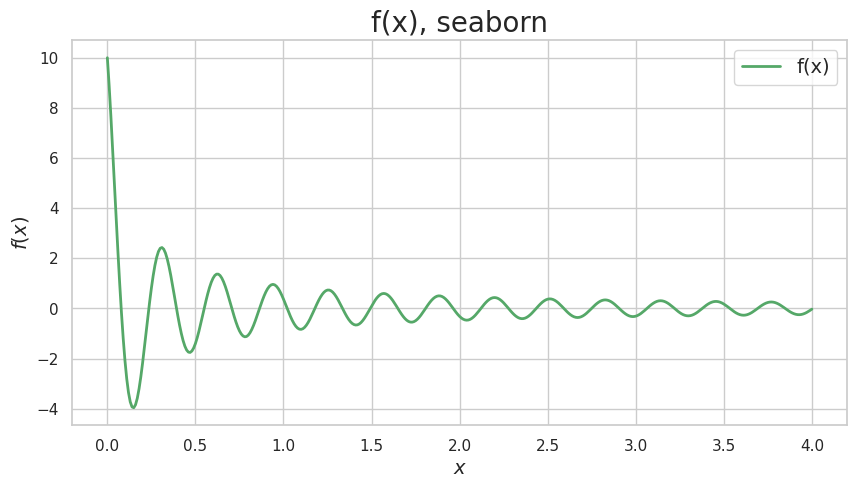

In [6]:
# вывести графики

plt.figure(figsize=(10, 5))
show_matplotlib(x, y)
plt.show()
plt.figure(figsize=(10, 5))
show_seaborn(x, y)
plt.show()
fig = show_plotly(x, y)
fig.show()


# Задача2

Загрузите набор данных из файла car_data.csv к текущему домашнему заданию. 

In [7]:
df = pd.read_csv("car_data.csv")
df.head(2)

,Unnamed: 0,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [8]:
# 1.С использованием диаграммы boxplot визуализируйте зависимость числового признака от категориального. 
#   Ящики в диаграмме визуализировать горизонтально. Используйте библиотеку seaborn или plotly
fig = px.box(df, x='Price ($)', y='Company',
                  width=1348, height=512, template='plotly',
            hover_data=['Model', 'Dealer_Region'])
fig.show()
plotly.io.write_image(fig, 'task_2_1_boxplot.png')

In [9]:
# 2.Постройте Scatterplot для двух числовых признаков из набора данных, отметив разными цветами категориальный признак. 
#   Использовать любую из библиотек: matplotlib, seaborn, plotly.
fig = px.scatter(df, x='Annual Income', y='Price ($)', 
                  width=1024, height=1024, template='plotly',
                  color='Body Style',  
            hover_data=['Model', 'Gender'])
fig.show()
plotly.io.write_image(fig, 'task_2_1_scatter plot.png')

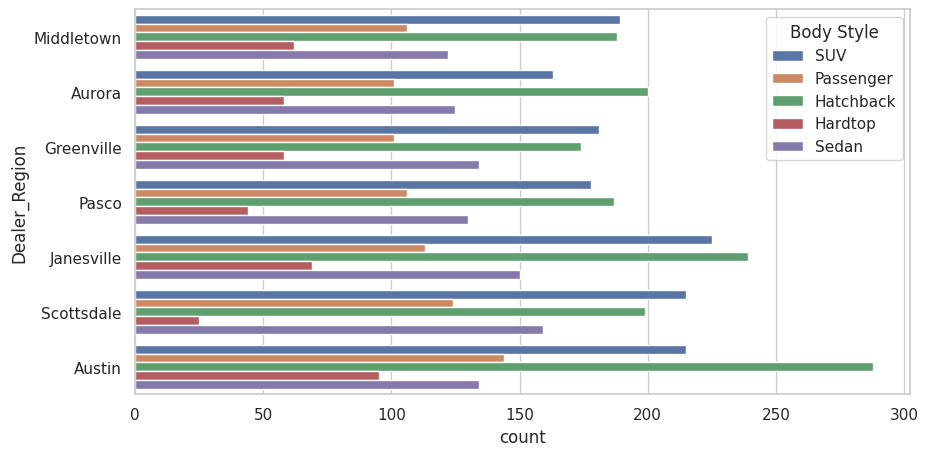

In [10]:
# 3.Постройте диаграмму Count plot для нескольких категориальных признаков (минимально взять 2 признака) из набора данных. 
#   Используйте библиотеку seaborn или plotly. 
plt.figure(figsize=(10, 5))
sns.countplot(df, y="Dealer_Region", hue="Body Style", stat="count")
plt.show()

# Задача3 

In [11]:
original_file_url = "https://cdn.culture.ru/images/9d95ba89-f1b2-5d81-9344-955e8faca148"
scaled_file       = "photo_scaled.jpg"
croped_file       = "photo_croped.jpg"
resized_file      = "photo_resized.jpg"
grayscale_file    = "photo_grayscale.jpg"

In [12]:
def rgb2grayscale(image_rgb):
    image_rgb_red = image_rgb[:, :, 0]
    image_rgb_green = image_rgb[:, :, 1]
    image_rgb_blue = image_rgb[:, :, 2]
    gray_img = (0.2989 * image_rgb_red + 0.587 * image_rgb_green + 0.114 * image_rgb_blue).astype(np.uint8)
    return gray_img

In [13]:
def my_scale(original_image, new_rows_count, new_columns_count):
    number_rows = len(original_image)  
    number_columns = len(original_image[0])
    rows_step = number_rows / new_rows_count
    columns_step = number_columns / new_columns_count
    new_image = np.array([[original_image[int(rows_step * r), int(columns_step * c)] for c in range(new_columns_count)] for r in range(new_rows_count) ])
    return new_image

In [14]:
def my_crop(original_image, new_rows_count, new_columns_count):
    number_rows = len(original_image)  
    number_columns = len(original_image[0])  
    row_start = int((number_rows - new_rows_count) / 2)
    column_start = int((number_columns - new_columns_count) / 2)
    new_image = original_image[row_start:row_start+new_rows_count, column_start:column_start+new_columns_count]
    return new_image

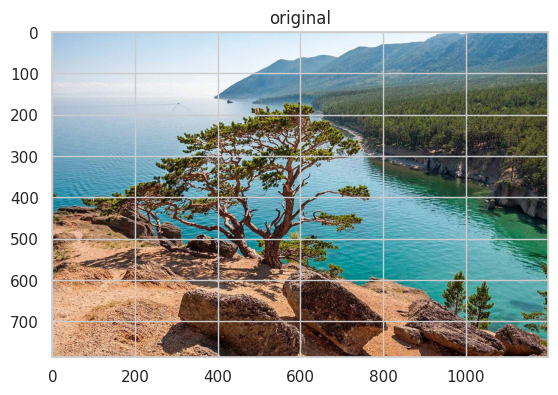

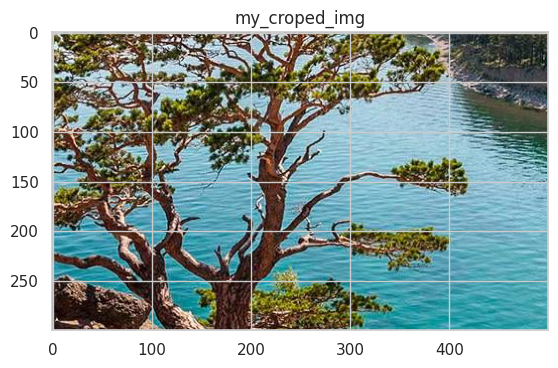

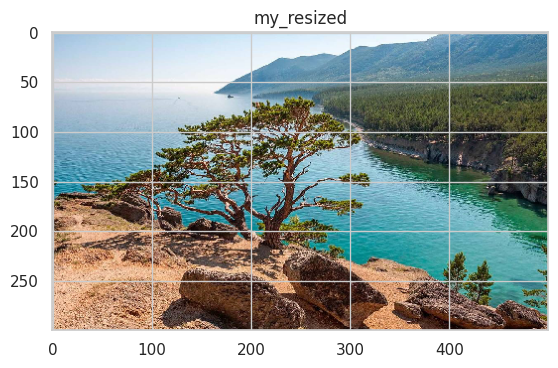

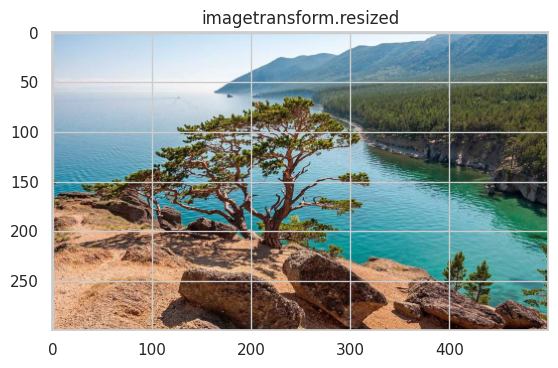

In [15]:
# 1.Сохранить любую цветную фотографию размером 300x500 пикселов в форматеJPEG(jpg).
with Image.open(requests.get(original_file_url, stream=True).raw) as image_orig:
    # загрузить оригинальное фото
    original_img = np.array(image_orig) 
    image_orig.getcolors()
    plt.imshow(original_img)
    plt.title('original')
    plt.show()

    # вырезать центр 300x500
    my_croped_img = my_crop(original_img, 300, 500)
    plt.imshow(my_croped_img)
    plt.title('my_croped_img')
    plt.show()
    Image.fromarray(my_croped_img).save(croped_file)

    # изменить размер на 300x500
    my_resized_img = my_scale(original_img, 300, 500)
    plt.imshow(my_resized_img)
    plt.title('my_resized')
    plt.show()
    Image.fromarray(my_resized_img).save(scaled_file)
        
    # изменить размер на 300x500
    resized_img = imagetransform.resize(original_img, (300, 500))
    plt.imshow(resized_img)
    plt.title('imagetransform.resized')
    plt.show()
    # сохранить файл с измененным размеров
    plt.imsave(resized_file, resized_img)

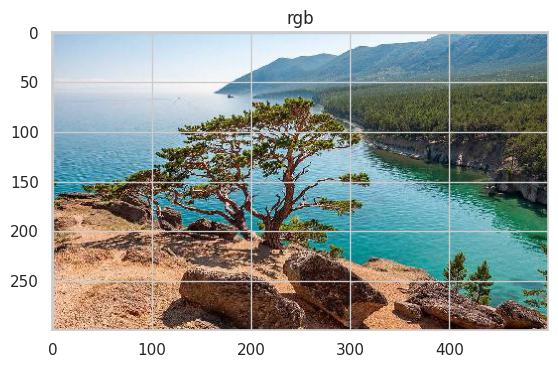

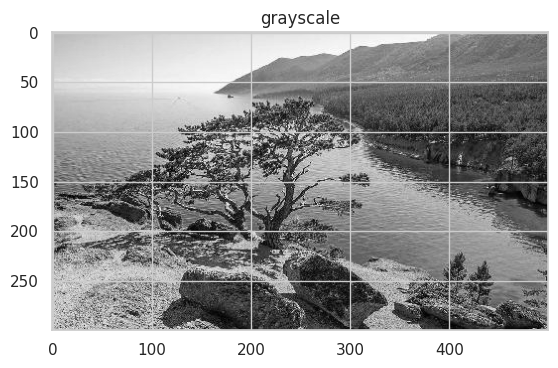

In [16]:
# 2.Загрузить в программу и отобразить фотографию в полноцветном варианте(RGB) и в градациях серого(grayscale).
# Используйте библиотеку matplotlib.

with Image.open(scaled_file) as image_rz:
    image_rgb = np.array(image_rz) 
    plt.imshow(image_rgb)
    plt.title('rgb')
    plt.show()

    gray_img = rgb2grayscale(image_rgb)
    plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
    plt.title('grayscale')
    plt.show()
    
    #plt.imsave(grayscale_file, gray_img, cmap=plt.get_cmap("gray"))
    Image.fromarray(gray_img).save(grayscale_file)